# Assignments for Week-02

## 1. Re-code the house price machine learning

In [2]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()

In [5]:
x,y = data['data'], data['target']

In [6]:
x_rm = x[:,5]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

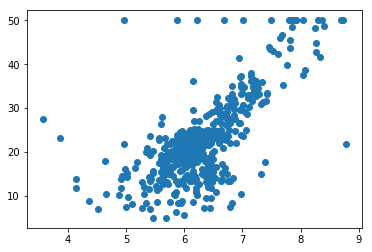

In [11]:
plt.scatter(x_rm, y)

### price

In [18]:
def price(rm, k, b):
    return rm*k+b

### loss

In [19]:
def loss(y, y_hat):
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

### 1. Random Choose Method to get optimal k and b

In [23]:
import random

In [29]:
def random_find_k_b(trying_times):
    min_loss = float('inf')
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in x_rm]

        current_loss = loss(y, price_by_random_k_and_b)
    
        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    return best_k, best_b

When time is : 0, get best_k: 59.85861110273737 best_b: 79.88793745573483, and the loss is: 189273.8278539751
When time is : 1, get best_k: -27.995212125835593 best_b: -79.48797095031459, and the loss is: 77983.665052409
When time is : 4, get best_k: -8.350991548913228 best_b: 95.85847030076525, and the loss is: 628.1004109817411
When time is : 13, get best_k: 15.398108415385664 best_b: -70.844935904185, and the loss is: 74.64826467887572
When time is : 65, get best_k: 8.197006017556618 best_b: -27.128978952387797, and the loss is: 47.43926713533292
When time is : 1227, get best_k: 8.785680305835626 best_b: -32.68645786508, and the loss is: 43.64990394878659


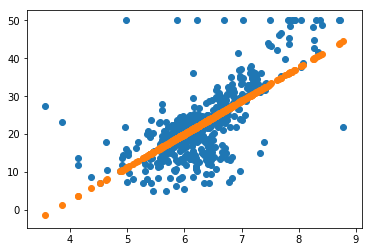

In [30]:
k,b = random_find_k_b(10000)
price_by_random_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_random_k_and_b)

### 2.Supervised Direction to get optimal k and b

In [36]:
direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

def supervised_find_k_b(trying_times):
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100

    next_direction = random.choice(direction)

    scalar = 1.0

    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in x_rm]
        current_loss = loss(y, price_by_k_and_b)
    
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b

            next_direction = next_direction
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k, best_b

When time is : 0, get best_k: -77.94597090071994 best_b: -74.44354022025112, and the loss is: 348156.09535589156
When time is : 4, get best_k: -76.94597090071994 best_b: -73.44354022025112, and the loss is: 339574.07303937443
When time is : 5, get best_k: -75.94597090071994 best_b: -72.44354022025112, and the loss is: 331099.16790960415
When time is : 6, get best_k: -74.94597090071994 best_b: -71.44354022025112, and the loss is: 322731.3799665815
When time is : 7, get best_k: -73.94597090071994 best_b: -70.44354022025112, and the loss is: 314470.7092103053
When time is : 8, get best_k: -72.94597090071994 best_b: -69.44354022025112, and the loss is: 306317.15564077615
When time is : 9, get best_k: -71.94597090071994 best_b: -68.44354022025112, and the loss is: 298270.7192579939
When time is : 10, get best_k: -70.94597090071994 best_b: -67.44354022025112, and the loss is: 290331.40006195946
When time is : 11, get best_k: -69.94597090071994 best_b: -66.44354022025112, and the loss is: 282

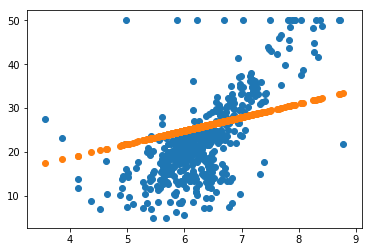

In [37]:
k,b = supervised_find_k_b(10000)
price_by_supervised_k_and_b = [price(r, k, b) for r in x_rm]
plt.scatter(x_rm, y)
plt.scatter(x_rm, price_by_supervised_k_and_b)

### 3.Gradient Descent to get optimal k and b

### 4. Try different Loss function and learning rate.

## 2. Answer following questions:

1. Why do we need machine learning methods instead of creating a complicated formula?

==> 首先很难构造这样的复杂函数，其次即使创造的函数能符合目前的数据，但是未来的数据是未知的，构造的函数不能满足未来的数据。与其这样不如让机器根据已有的数据自己学习并构造这样的函数。

2. Wha't's the disadvantages of the 1st Random Choosen methods in our course?

==> 第一种随机方法很盲目，虽然增加迭代次数可以让loss逐步变小，但是过程太漫长了。消耗时间多

3. Is the 2nd method supervised direction better than 1st one? What's the disadvantages of the 2nd supversied directin method?

==> 第二种有监督的方向学习比第一种好。

4. Why do we use Derivative / Gredient to fit a target function?

5. In the words 'Gredient Descent', what's the Gredient and what's the Descent?
Ans:

6. What's the advantages of the 3rd gradient descent method compared to the previous methods?
Ans:

7. Using the simple words to describe: What's the machine leanring.
Ans:

## 3. Finish the search problem

### 1. Get data from web page.

In [124]:
import requests
import re

In [125]:
def get_data_sub_links():
    base_link='http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId='
    url = r'http://www.njmetro.com.cn/njdtweb/home/go-line-intro.do?columnId=8a8080076512510d0165130727520004&rowId=8a80800765a29a780165a8538b6f0018'
    response = requests.get(url)
    what_we_want = r'<a href="javascript:;" id="([0-9a-f]+)" onclick="changeLine\(id\)" class="ser_02_ta" style="width:40px;">(.+号线)</a>'
    pattern = re.compile(what_we_want)
    likes = pattern.findall(response.text)
    sub_links = []
    for like in likes:
        link, name = like
        sub_links.append(base_link + link)
    return sub_links

In [127]:
sub_links = get_data_sub_links()
sub_links

['http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a8538b6f0018',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85300730016',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85265a30014',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a851d3490012',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a85112650010',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a850496e000e',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84fbd81000c',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84d2c38000a',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a84c8d350008',
 'http://www.njmetro.com.cn/njdtweb/portal/get-lineIntro.do?rowId=8a80800765a29a780165a7b59

### 2. Preprocessing data from page source.

In [112]:
import json
def download_data(url):
    """ download data """
    try:
        r = requests.get(url)
        #the text is a json, convert it to python dictionary
        data = json.loads(r.text)
        html = data['articleContent']
        return html
    except:
        print("error")

In [150]:
from bs4 import BeautifulSoup
import bs4
def fill_graph(graph, html):
    #use Beautifulsoup to extract data from table
    soup = BeautifulSoup(html, "html.parser")
    for tr in soup.find('tbody').children:
        if isinstance(tr, bs4.element.Tag):
            tds = tr('td')
            # tds[0] from--to tds[1] distance
            if tds[0].string:
                match_obj = re.match(r'(.+)——(.+)', tds[0].string)
                if match_obj:
                    f = match_obj.group(1)
                    t = match_obj.group(2)
                    d = int(tds[1].string)
                    #print(f, t, d)
                    graph[f].append((t, d))
                    graph[t].append((f, d))
                    #graph[f].append(t)
                    #graph[t].append(f)

In [151]:
from collections import defaultdict
graph = defaultdict(list)
for link in sub_links:
    html = download_data(link)
    fill_graph(graph, html)

### 3. Build the search agent

In [152]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
station_graph = nx.Graph(graph)
#station_graph.add_nodes_from(list(graph.keys()))

In [154]:
#nx.draw(station_graph, with_labels=True, node_size=30)

In [158]:
def search(station_from, station_to, graph):
    pathes = [[station_from]]
    
    visitied = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        if froninter in visitied: continue
        successors = graph[froninter]
        for station, distance in successors:
            if station in path: continue  # eliminate loop
            new_path = path + [station]
            pathes.append(new_path)
            #print(new_path)
            if station == station_to: return new_path
        
        visitied.add(froninter)

In [159]:
search('百家湖', '南京站', graph)

['百家湖',
 '胜太路',
 '河定桥',
 '双龙大道',
 '南京南站',
 '明城大道',
 '大明路',
 '卡子门',
 '雨花门',
 '武定门',
 '夫子庙',
 '常府街',
 '大行宫',
 '浮桥',
 '鸡鸣寺',
 '南京林业大学新庄',
 '南京站']

### 4 Create different policies for transfer system.

### 5. Test your result with commercial applications.